In [1]:
### JUPYTER NOTEBOOK / MODULE PATH FIX ###
import sys

if "/share/apps/python/3.8.6/intel/lib/python3.8" in sys.path and sys.path[1] == '':
    sys.path[1], sys.path[6] = sys.path[6], sys.path[1]

In [7]:
from jtb_2022_code.utils.figure_common import *
from jtb_2022_code.utils.adata_common import *
from jtb_2022_code.utils.pseudotime_common import *
from jtb_2022_code import FigureSingleCellData
from jtb_2022_code.utils.decay_common import calc_decays, calc_halflives
import numpy as np
import pandas as pd
import scanpy as sc

from jtb_2022_code.old_data.elife_data import OldElifeData
from jtb_2022_code.utils.dewakss_common import run_dewakss
from jtb_2022_code.figure_3_supplemental import figure_3_supplement_1_plot, figure_3_supplement_2_plot

In [4]:
## LOAD AND PROCESS DATA ###
data = FigureSingleCellData()
elife = OldElifeData()
elife.assign_times()
elife.denoise()
elife.calculate_velocities()
#data.load_published_decay()

#def _calc_decay_for_untreated(adata, *args, **kwargs):
#    untreated = adata[(adata.obs['Pool'] == 1) | (adata.obs['Pool'] == 2), :].copy()
#    calc_decays(untreated, *args, decay_key='unperturbed_decay', alpha_key='unperturbed_alpha')
#    adata.var['unperturbed_decay'] = untreated.var['unperturbed_decay'].copy()
    
#    return adata
    
#data.apply_inplace_to_expts(_calc_decay_for_untreated)

Reading Single Cell Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_fpr1.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_fpr1.h5ad
Loading /scratch/cj59/RAPA/2018_ELIFE_STATIC.h5ad


In [ ]:
elife.data

In [ ]:
from scipy.stats import spearmanr
import itertools
import pandas as pd

half_lives = [("Expt. 1", data.expt_data[(1, "WT")].var['unperturbed_decay']),
              ("Expt. 2", data.expt_data[(2, "WT")].var['unperturbed_decay']),
              ("Neymotin2014", data.all_data.var['Neymotin2014']),
              ("Chan2018", data.all_data.var['Chan2018']),
              ("Munchel2011", data.all_data.var['Munchel2011']),
              ("Miller2011", data.all_data.var['Miller2011']),
              ("Geisberg2015", data.all_data.var['Geisberg2015'])]

hl_spearmans = pd.DataFrame([[x[0], y[0], spearmanr(x[1], y[1], nan_policy='omit')[0]] 
                             for x, y in itertools.product(half_lives, half_lives)])

Loading denoised data from /scratch/cj59/RAPA/2021_RAPA_DENOISED_FIGS_1_WT.h5ad


/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Loading denoised data from /scratch/cj59/RAPA/2021_RAPA_DENOISED_FIGS_2_WT.h5ad


/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


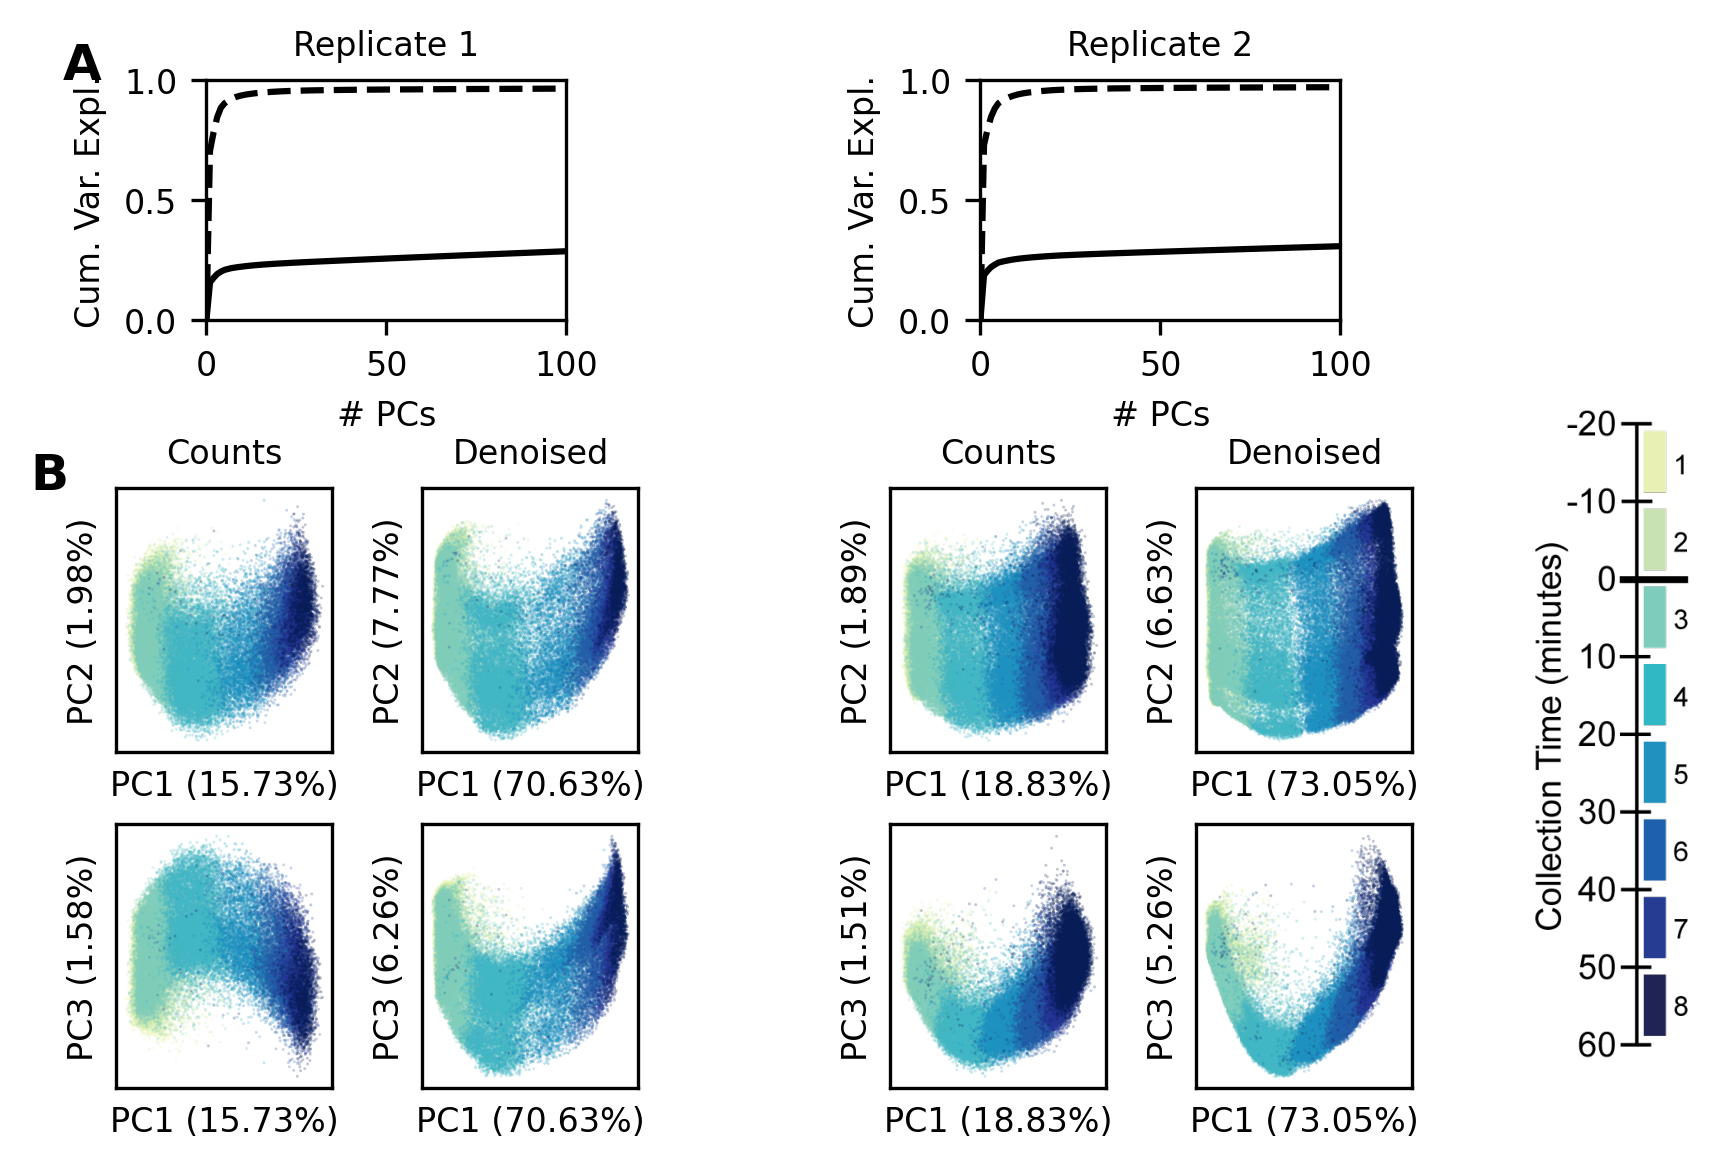

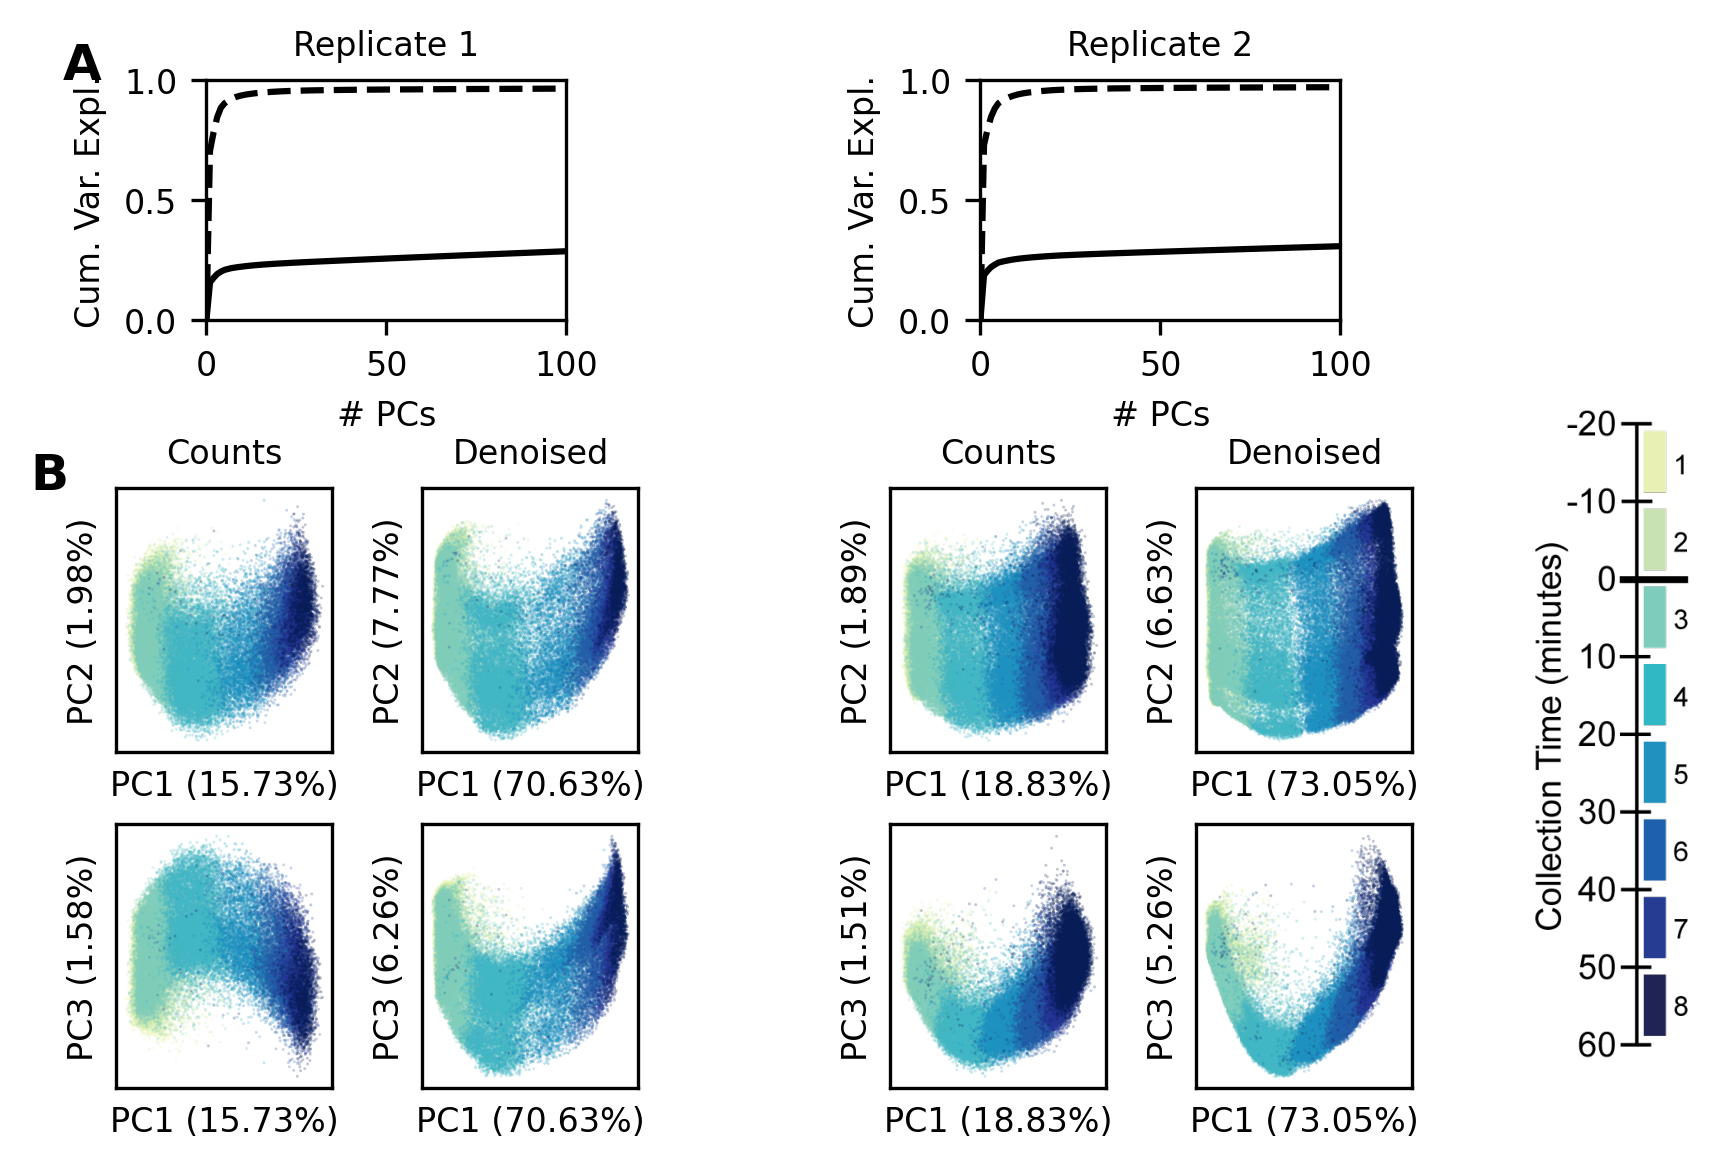

In [5]:
figure_3_supplement_1_plot(data)

Loading denoised data from /scratch/cj59/RAPA/2021_RAPA_DENOISED_FIGS_2_WT.h5ad


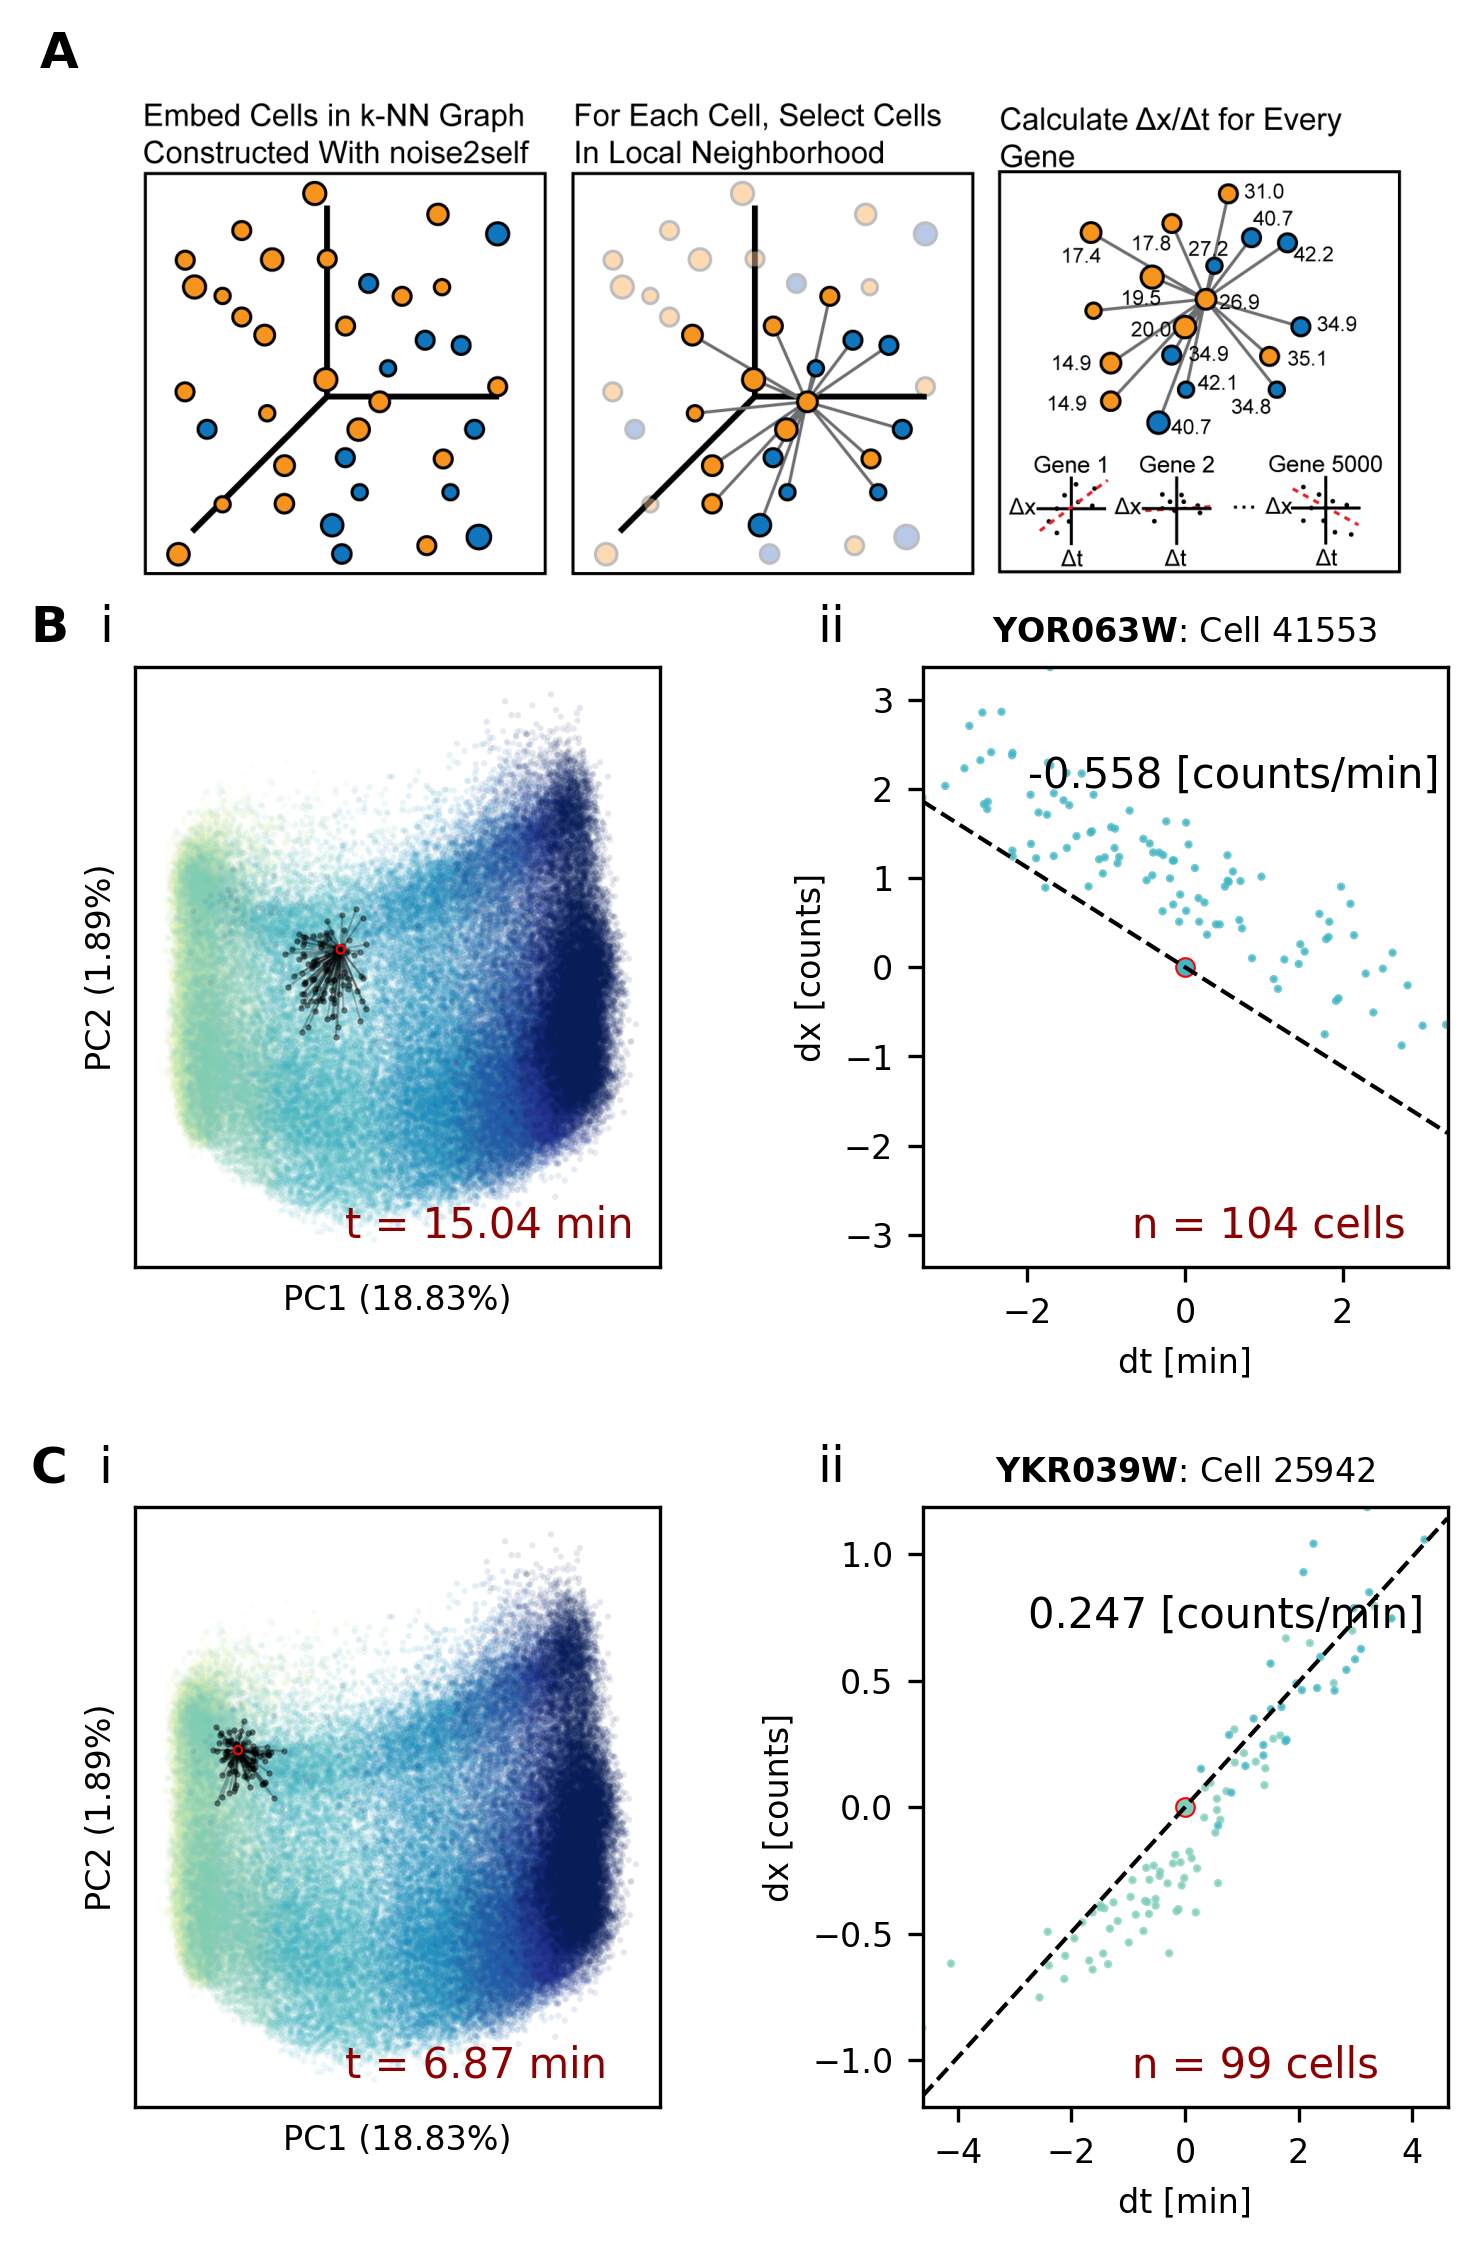

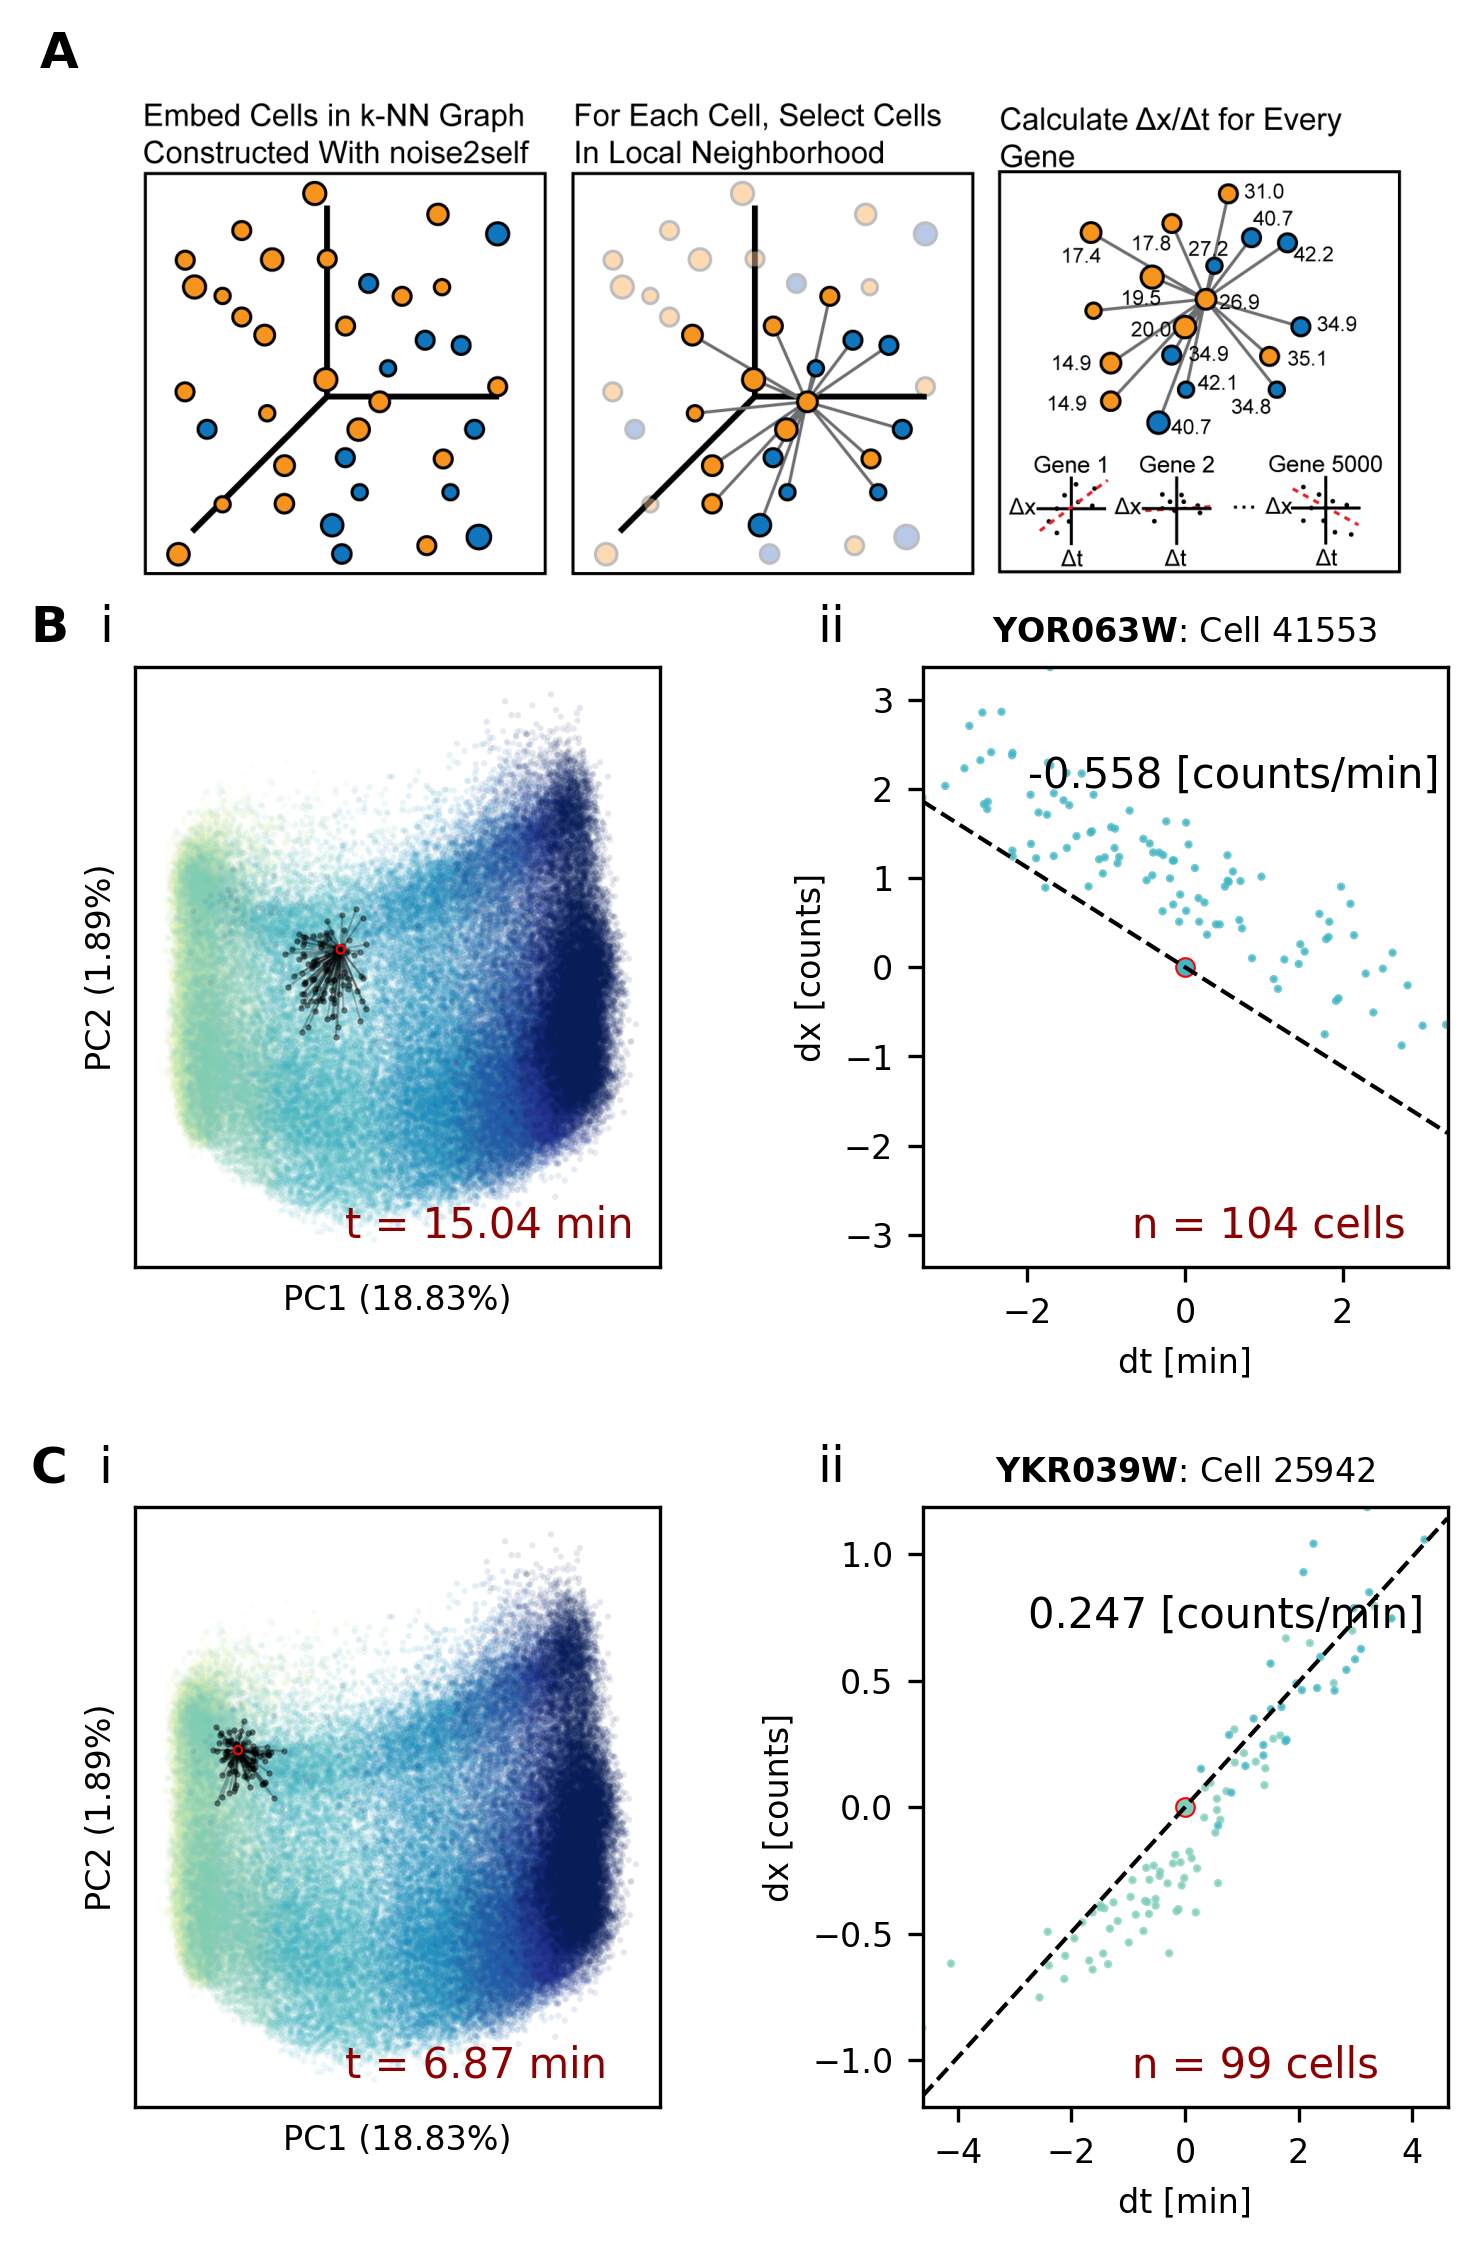

In [9]:
figure_3_supplement_2_plot(data)

In [ ]:
import scipy.sparse

elife.data.layers['counts'] = scipy.sparse.csr_matrix(elife.data.X.astype(np.int32))
elife.assign_times()

In [ ]:
elife.data.obs['cell_cycle_time'].max()

In [ ]:
data.all_data.obs['n_counts'].median()


In [ ]:
elife.get_data(genotype=None)